<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  SVD en reconocimiento facial

En este caso-taller vamos a aplicar SVD para hacer reconocimiento facial. Esta aplicación se conoce como caras propias, o eigenfaces en inglés, y si bien es una forma rudimentaria de reconocimiento facial sus resultados pueden ser muy interesantes. El problema de las caras propias fue estudiado por primera vez por Sirovich y Kirby en 1987, ampliado en 1990 y su aplicación al reconocimiento facial automatizado fue presentado por Turk and Pentland en 1991.

En este taller vamos a utilizar la base de datos conocida como Caras Etiquetadas en la Naturaleza, o Labeled Faces in the Wild (LFW). Esta base es provista por la Universidad de Massachusetts Amherst para que la comunidad académica la utilice para la evaluación de modelos predictivos.

La base contiene más de 13.000 imágenes de rostros recopilados de la web y cada cara ha sido etiquetada con el nombre de la persona representada. Un subconjunto de 1.680 de las personas fotografiadas tienen dos o más fotos distintas en el conjunto de datos. 


 
#### Referencias

- G. B. Huang,  M. Ramesh, T. Berg, and E. Learned-Miller. Labeled Faces in the Wild: A Database for Studying Face Recognition in Unconstrained Environments. University of Massachusetts, Amherst, Technical Report 07-49, October, 2007.

- M. Kirby and L. Sirovich. Application of the Karhunen-Loève procedure for the characterization of human faces. IEEE Transactions on Pattern Analysis and Machine Intelligence (PAMI), 12(1):103–108, 1990.

- L. Sirovich and M. Kirby. A low-dimensional procedure for the characterization of human faces. Journal of the Optical Society of America A, 4(3):519–524, 1987

- M. Turk and A. Pentland. Eigenfaces for recognition. Journal of Cognitive Neuroscience, 3(1):71–86, 1991.

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos  en la misma ruta de acceso del cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

Los datos pueden ser descargados directamente utilizando la librería `scikit-learn`, para ello cargue la base utilizando la función `fetch_lfw_people`. Esta función verificará si los datos están disponibles. De no estarlo, `scikit-learn` los descargará automáticamente desde el sitio web de la Universidad de Massachusetts. Descargue las imágenes para individuos que tengan al menos 25 imágenes y guárdelos en una carpeta llamada `data` usando esta función.

In [2]:
# Utilice este espacio para escribir el código.
#Carga de librerias
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import clear_data_home
import numpy as np
import pandas as pd

# Limpiar el caché
#clear_data_home()

#Guardar datos en la carpeta directa del directorio
#data=fetch_lfw_people(min_faces_per_person=25, resize=0.5, data_home='./data/')

data = fetch_lfw_people(min_faces_per_person=25, download_if_missing=True)
_, h, w = data.images.shape
X = data.data
y = data.target
target_names = data.target_names


Se descarga la data usando la funcion cargada y se elige que min_faces_per_person sea igual a 25, es decir que se descargue imagenes para individuos que tengan al menos 25 imagenes

### 2.  Análisis preliminar 

Describa los contenidos de la base, tenga en cuenta que debe detallar los elementos, la dimensión de la base, y la dimensión de las imágenes. 

In [3]:
# Utilice este espacio para escribir el código.
print(type(data))

print(data.keys())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


Se tiene datos en clase sklearn.utils._bunch.Bunch.

Como se puede ver es un diccionario con 'data', 'images', 'target', 'target_names', 'DESCR'

'data': Contiene los datos de las características del dataset en forma de un array de NumPy

'images': Contiene las imágenes en formato de array de NumPy.

'target':Contiene las etiquetas o clases objetivo para cada ejemplo en el dataset.

'target_names':Es una lista que contiene los nombres de las clases o etiquetas.

'DESCR':Contiene una descripción del dataset.


In [4]:
print(X.shape)

(2588, 2914)


Indica que cada una de las 1909 imagenes en el dataset ha sido aplanada en un vector unidimensional que describe los valores de los pixeles, esto se hace para poder ser usados por algoritmos de aprendizaje, sin embargo se puede convertir multiplicando ancho x altura

In [5]:
imagenes = data['images']
print(imagenes.shape)

(2588, 62, 47)


In [6]:
#Transformacion a una sola dimension como se ve en X
n_imagenes, altura, ancho=imagenes.shape
print(altura*ancho)

2914


In [7]:
num_img = len(data.images)
num_img

2588

En este caso se ve que hay 1909 imagenes, con altura de 62 pixeles x ancho de 47 pixeles

In [8]:
target_names = data['target_names']
print(target_names)

['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Bill Clinton' 'Colin Powell' 'David Beckham'
 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Gray Davis' 'Guillermo Coria' 'Hans Blix'
 'Hugo Chavez' 'Jack Straw' 'Jacques Chirac' 'Jean Chretien'
 'Jennifer Capriati' 'John Ashcroft' 'John Negroponte'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva' 'Mahmoud Abbas'
 'Megawati Sukarnoputri' 'Nestor Kirchner' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Serena Williams'
 'Silvio Berlusconi' 'Tom Daschle' 'Tom Ridge' 'Tony Blair' 'Vicente Fox'
 'Vladimir Putin']


In [9]:
num_clases = len(data.target_names)
num_clases

42

Estos target names, son las caras de las personas que se tienen en el dataset, en este caso son 23, y la idea de este taller fue hacer que cada una tuviera por lo menos 25 imagenes para ser entrenado

In [10]:
description = data['DESCR']
print(description)

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenCV li

Esta descripcion de arriba explica que se tienen las fotos de las personas centradas en sus caras y un target name que dice quien es. Se puede usar esta base de datos tanto para una clasificacion binaria para saber si dos imagenes son de la misma persona, o reconocimiento facial. Esta ultima sera en la que se basara este taller

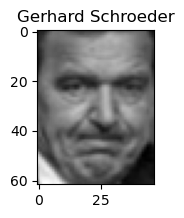

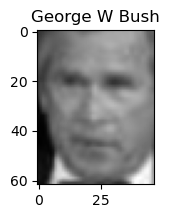

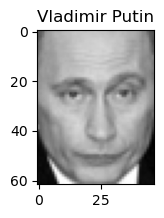

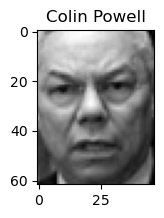

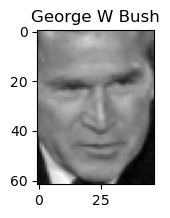

In [11]:
for i in range(5):
    plt.figure(figsize=(2, 2))
    plt.imshow(data.images[i], cmap='gray')
    plt.title(data.target_names[data.target[i]])
    plt.show()

Se puede ver entonces que es posible ver la cara de las personas y su nombre, estos son solo los primeros 5

In [12]:
imagenes_clases = [np.sum(data.target == i) for i in range(num_clases)]
for i, nombre_clase in enumerate(target_names):
    print(f"{nombre_clase}: {imagenes_clases[i]} imágenes")

Alejandro Toledo: 39 imágenes
Alvaro Uribe: 35 imágenes
Andre Agassi: 36 imágenes
Ariel Sharon: 77 imágenes
Arnold Schwarzenegger: 42 imágenes
Bill Clinton: 29 imágenes
Colin Powell: 236 imágenes
David Beckham: 31 imágenes
Donald Rumsfeld: 121 imágenes
George W Bush: 530 imágenes
Gerhard Schroeder: 109 imágenes
Gloria Macapagal Arroyo: 44 imágenes
Gray Davis: 26 imágenes
Guillermo Coria: 30 imágenes
Hans Blix: 39 imágenes
Hugo Chavez: 71 imágenes
Jack Straw: 28 imágenes
Jacques Chirac: 52 imágenes
Jean Chretien: 55 imágenes
Jennifer Capriati: 42 imágenes
John Ashcroft: 53 imágenes
John Negroponte: 31 imágenes
Juan Carlos Ferrero: 28 imágenes
Junichiro Koizumi: 60 imágenes
Kofi Annan: 32 imágenes
Laura Bush: 41 imágenes
Lleyton Hewitt: 41 imágenes
Luiz Inacio Lula da Silva: 48 imágenes
Mahmoud Abbas: 29 imágenes
Megawati Sukarnoputri: 33 imágenes
Nestor Kirchner: 37 imágenes
Recep Tayyip Erdogan: 30 imágenes
Ricardo Lagos: 27 imágenes
Roh Moo-hyun: 32 imágenes
Rudolph Giuliani: 26 imáge

Se pudo observar tambien el numero de imagenes por politico en la base de datos para cada uno de los 42 politicos en la data

A continuación responda las siguientes preguntas: 

- ¿Cuál es la distribución de imágenes por individuos? 

Tanto como se vio anteriormente como se puede ver ahora con la grafica la distribucion de imagenes por individuo es:

George W Bush: 530 imágenes

Colin Powell: 236 imágenes

Tony Blair: 144 imágenes

Donald Rumsfeld: 121 imágenes

etc

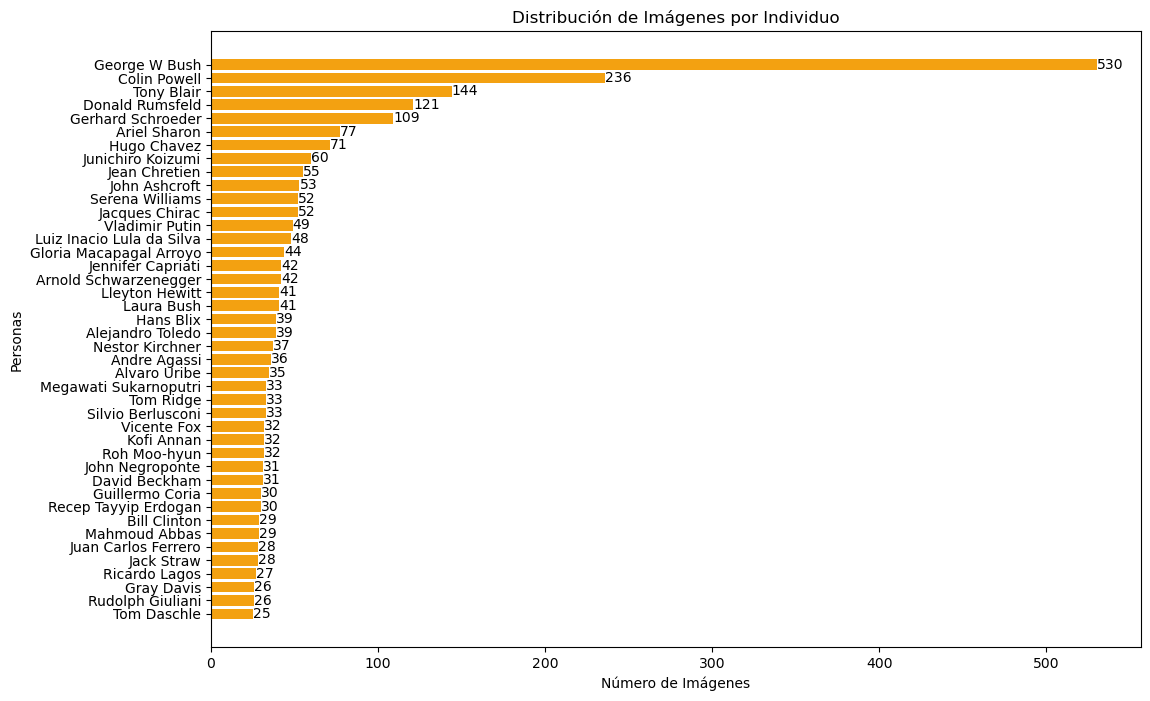

In [13]:
# Utilice este espacio para escribir el código.
indices_org = np.argsort(imagenes_clases)
imagenes_clases_org = np.array(imagenes_clases)[indices_org]
target_names_org = np.array(target_names)[indices_org]

# Graficar la distribución
plt.figure(figsize=(12, 8))
bars = plt.barh(target_names_org, imagenes_clases_org, color='#f3a111')


for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width}', 
             va='center', ha='left', color='black', fontsize=10)
    

plt.xlabel('Número de Imágenes')
plt.ylabel('Personas')
plt.title('Distribución de Imágenes por Individuo')
plt.show()

- ¿Cuántas imágenes pertenecen a Serena Williams? Grafíquelas 

Como se vio antes Serena Williams: 52 imágenes, tambien se puede volver a calcular:

In [14]:
# Utilice este espacio para escribir el código.

# Índice de Serena Williams en Target
indice_s = np.where(target_names == 'Serena Williams')[0][0]

# Índices de las imágenes de Serena Williams
imagenes_s = np.where(data.target == indice_s)[0]

# Guardar los índices en una lista
indices_imagenes_s = imagenes_s.tolist()

    
print("Cantidad de imagenes de Serena Williams", len(indices_imagenes_s))

Cantidad de imagenes de Serena Williams 52


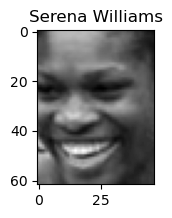

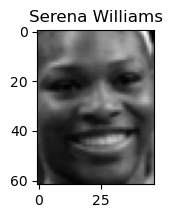

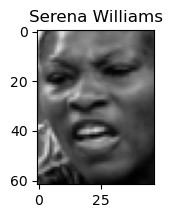

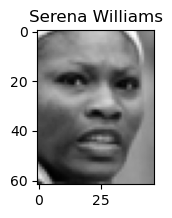

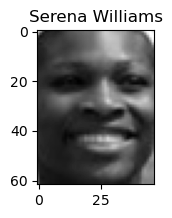

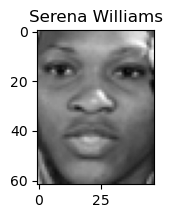

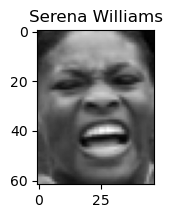

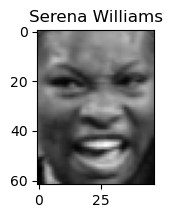

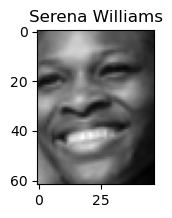

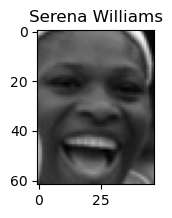

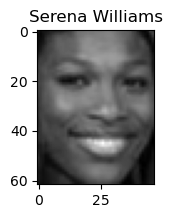

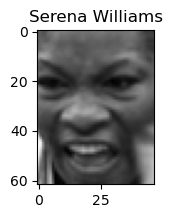

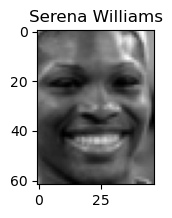

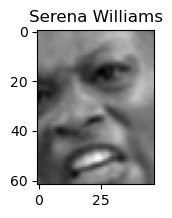

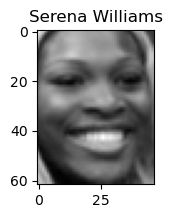

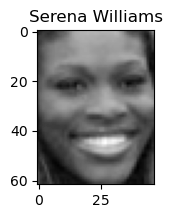

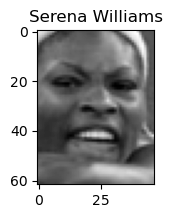

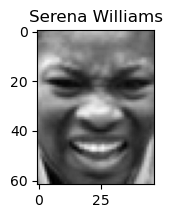

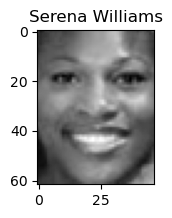

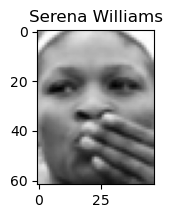

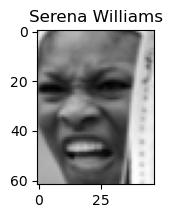

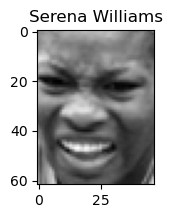

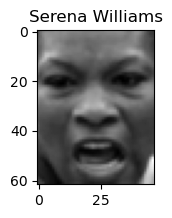

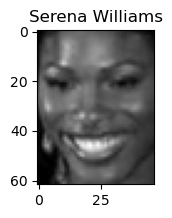

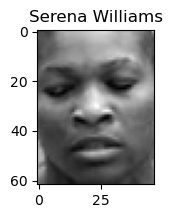

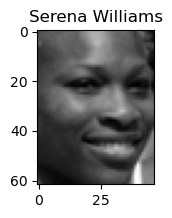

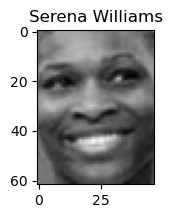

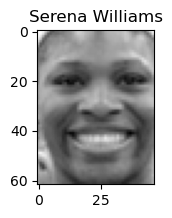

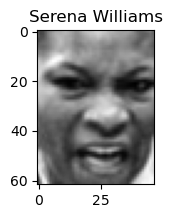

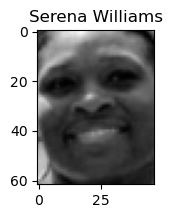

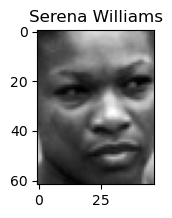

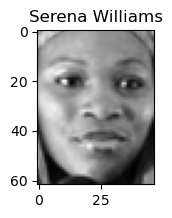

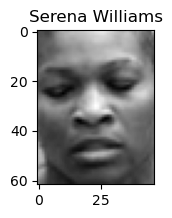

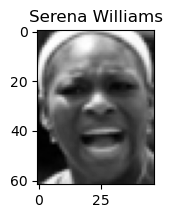

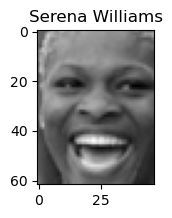

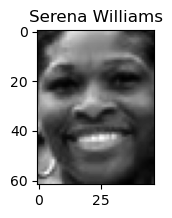

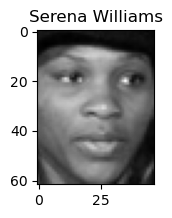

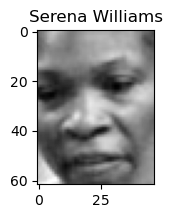

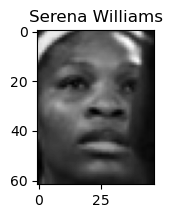

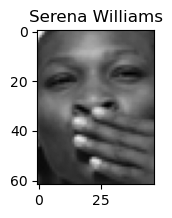

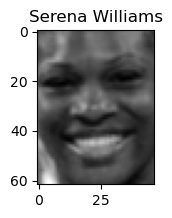

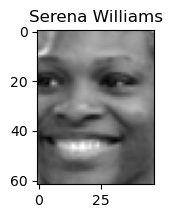

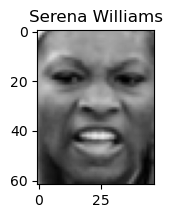

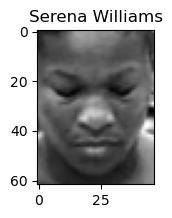

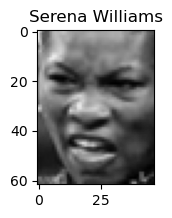

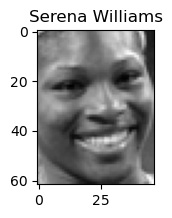

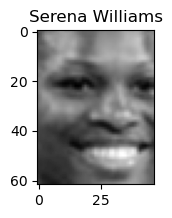

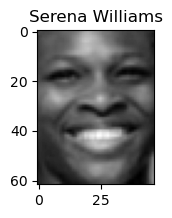

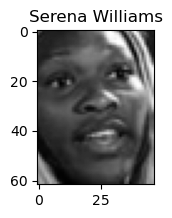

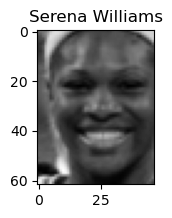

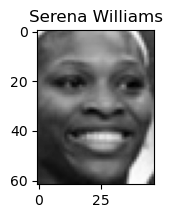

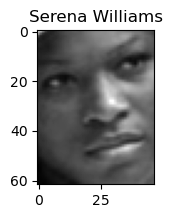

In [15]:
for i in  indices_imagenes_s[:]:
    plt.figure(figsize=(2, 2))
    plt.imshow(data.images[i], cmap='gray')
    plt.title(data.target_names[data.target[i]])
    plt.show()

De esta forma se buscan unicamente los valores que pertenecen a Serena y vemos 5 imagenes de ella en la base

### 3.  Reconociendo rostros: las eigenfaces

Las eigenfaces son un conjunto de eigenvectors utilizados en el campo de la visión por computadora, principalmente en el reconocimiento de rostros. Son el resultado de reducir la dimensión de un gran conjunto de imágenes faciales, manteniendo la información que es más relevante para diferenciar las caras.

En este apartado buscaremos encontrar el espacio de menor dimensión manteniendo la información que es más relevante para diferenciar las caras. Lo haremos en etapas:


#### 3.1. Rostro promedio. 

Encuentre primero el "rostro promedio" y grafíquelo.  Para encontrar este rostro, necesita calcular el valor promedio de los pixeles. (*Tip: Si X es la matriz donde las filas representan las imágenes  y en las columnas el tono de gris de los píxeles, debería calcular el promedio para cada una de las columnas*).
 

Rostro promedio:  [[0.33634675 0.34796327 0.36883336 ... 0.35834458 0.3466191  0.34177196]
 [0.34093553 0.3569545  0.3836309  ... 0.3656007  0.34806406 0.34065196]
 [0.3479589  0.36859238 0.39924175 ... 0.376023   0.35232988 0.34112534]
 ...
 [0.34082142 0.35410067 0.3674793  ... 0.43643886 0.4197473  0.4055294 ]
 [0.33453158 0.3485485  0.36568588 ... 0.4441789  0.42525873 0.40756938]
 [0.32817066 0.34172294 0.3618805  ... 0.45015088 0.42887065 0.4073585 ]]


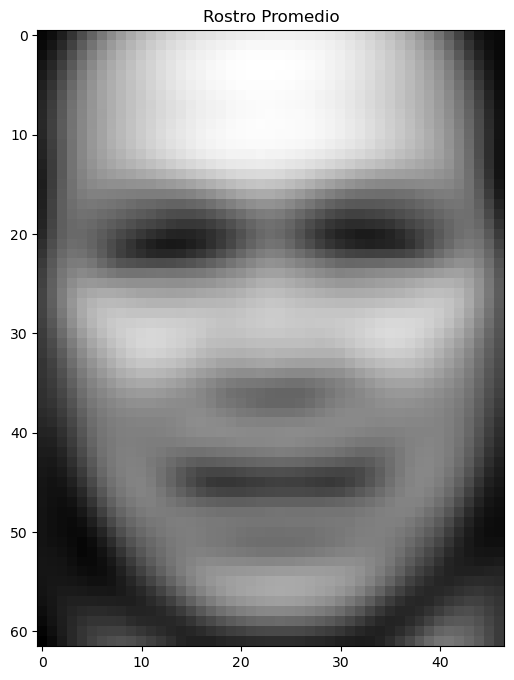

In [16]:
# Utilice este espacio para escribir el código.

imagenes = data.images

rostro_promedio = np.mean(imagenes, axis=0)

print("Rostro promedio: ",rostro_promedio)

# Graficar el rostro promedio
plt.figure(figsize=(8, 8))
plt.imshow(rostro_promedio.reshape(imagenes.shape[1], imagenes.shape[2]), cmap='gray')
plt.title('Rostro Promedio')
plt.show()

Se puede ver lo que el modelo entiende como el rostro promedio, esto es el promedio de los pixeles en todas la base, como se puede ver forma una cara fantasmal pues encuentra cara, nariz, labios y la forma de la cara.

#### 3.2. Reste el rostro promedio.

A cada una de las imágenes, reste el rostro promedio, es decir, reste la media a cada columna. Grafique las imágenes de Serena Williams luego de quitarle el rostro promedio.

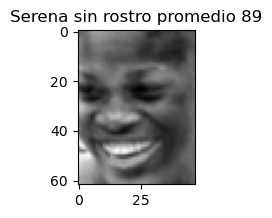

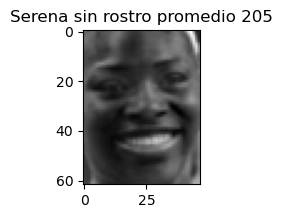

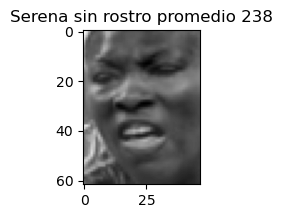

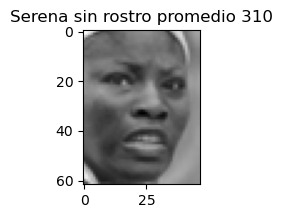

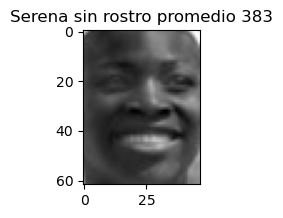

In [17]:
# Utilice este espacio para escribir el código.
imagenes_sin_rostro_promedio = imagenes - rostro_promedio

imagenes_serena_sin_promedio = imagenes_sin_rostro_promedio[imagenes_s]

for i in indices_imagenes_s[:5]:
    plt.figure(figsize=(2, 2))
    plt.imshow(imagenes_serena_sin_promedio[indices_imagenes_s.index(i)].reshape(imagenes.shape[1], imagenes.shape[2]), cmap='gray')
    plt.title(f"Serena sin rostro promedio {i}")
    plt.show()

Una vez se quita el rostro promedio de los datos y se vuelve a graficas se puede ver que la imagen se distorisiona. Restar el rostro promedio a cada imagen sirve para resaltar características individuales de las imágenes en lugar de mostrar el rostro promedio común. El rostro promedio representa las características comunes en todas las caras en las imágenes de la base de datos. Restar la cara promedio ayuda a eliminar informacion no relevante, destacando las diferencias individuales entre las imágenes.

#### 3.3. Descomposición en Valores Singulares 

Aplique la Descomposición en Valores Singulares a estas nuevas imágenes y retenga solo $K=1000$ valores singulares? ¿Qué proporción de la varianza representan estos valores singulares?

Proporción de la varianza representada por los primeros K=1000 valores singulares: 0.9979


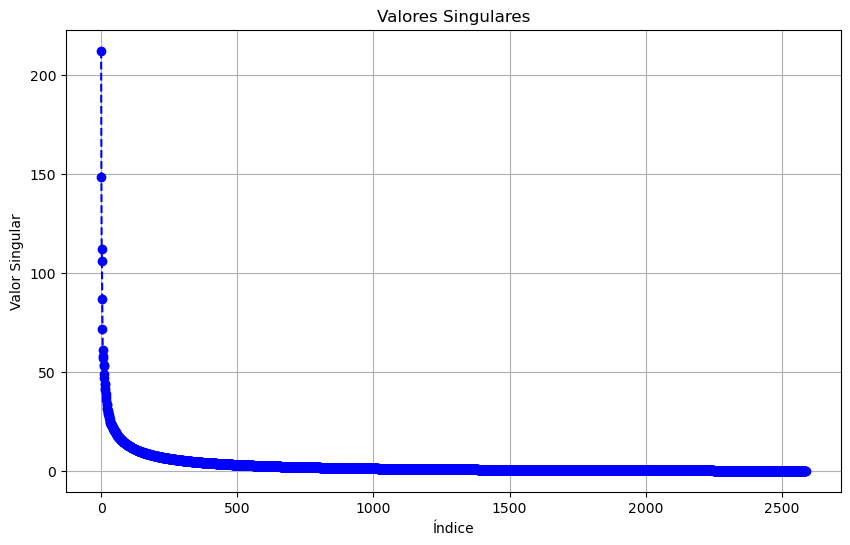

In [18]:
# Utilice este espacio para escribir el código.
n_imagenes, altura, ancho = imagenes_sin_rostro_promedio.shape

imagenes_a_planar = imagenes_sin_rostro_promedio.reshape(n_imagenes, altura * ancho)

U, S, Vt = np.linalg.svd(imagenes_a_planar, full_matrices=True)

K = 1000
S_reducido = S[:K]
U_reducido = U[:, :K]
Vt_reducido = Vt[:K, :]

varianza_total = np.sum(S**2)
varianza_explicada = np.sum(S_reducido**2)
proporcion_varianza = varianza_explicada / varianza_total

print(f"Proporción de la varianza representada por los primeros K={K} valores singulares: {proporcion_varianza:.4f}")

# Opcional: Graficar los valores singulares
plt.figure(figsize=(10, 6))
plt.plot(S, marker='o', linestyle='--', color='b')
plt.title('Valores Singulares')
plt.xlabel('Índice')
plt.ylabel('Valor Singular')
plt.grid(True)
plt.show()

In [19]:
proporcion_varianza

0.99787426

Como se vio arriba los primeros K=1000 valores singulares representan un 99.79% de la varianza, con esto ya se podria realizar un modelo robusto. 

La grafica de arriba muestra cada valor singular y su indice, se puede ver que los primeros valores singulares aportan mucho a la varianza y entre mas valores singulares se usen, la varianza cae

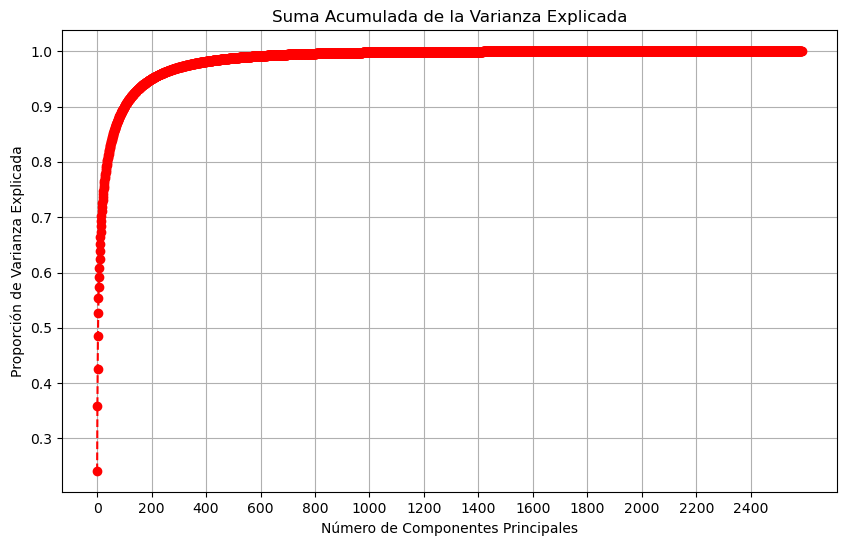

In [20]:
from matplotlib.ticker import MaxNLocator
# Calcular la varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(S**2) / varianza_total

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(varianza_explicada_acumulada, marker='o', linestyle='--', color='r')
plt.title('Suma Acumulada de la Varianza Explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción de Varianza Explicada')
plt.grid(True)

max_x = len(varianza_explicada_acumulada)
ticks = np.arange(0, max_x, 200)  
plt.xticks(ticks=ticks)  

plt.show()


Aqui vemos el numero de componentes principales y se ouede observar que con 100 componentes se explica cerca del 90% de la varianza, y de ahi en adelante decae cuanto se explica con mas componentes

#### 3.4. Representando los rostros en las bases

Las eigenfaces nos dice que cada rostro puede ser representado a partir de la aproximación a la matriz original por la matriz de dimensión reducida (determinada en el punto anterior), más el rostro promedio. Muestre que esto es posible para las imágenes de Serena Williams. Compare las imágenes reconstruidas con las originales.

In [21]:
# Utilice este espacio para escribir el código.
#l es numero de columnas de la matriz X, para no confundir con K=1000 componentes

l=X.shape[1]

S2= np.resize(S,[num_img,1])*np.eye(num_img,l)

X_reducido = np.dot(U_reducido,np.dot(S2[:1000,:1000],Vt_reducido))

rostro_promedio_aplanado = rostro_promedio.reshape(1, altura * ancho)

XNuevo=X_reducido + rostro_promedio_aplanado

XNuevo




array([[0.15184524, 0.19664443, 0.2005339 , ..., 0.18501281, 0.18161628,
        0.19475158],
       [0.20153237, 0.21636452, 0.24131927, ..., 0.91333438, 0.80737501,
        0.63568482],
       [0.38063811, 0.38341972, 0.44345352, ..., 0.09246898, 0.09283842,
        0.09283797],
       ...,
       [0.14492142, 0.17335826, 0.22231551, ..., 0.54275749, 0.62106496,
        0.62115006],
       [0.15002392, 0.2224432 , 0.27336714, ..., 0.80170615, 0.89981541,
        0.94751108],
       [0.48087673, 0.47052319, 0.51299711, ..., 0.42639128, 0.37703416,
        0.33416919]])

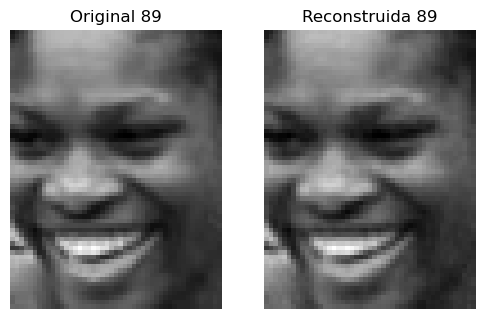

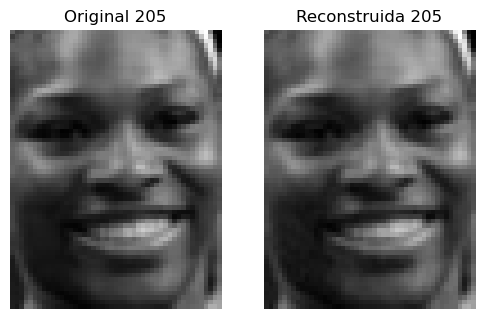

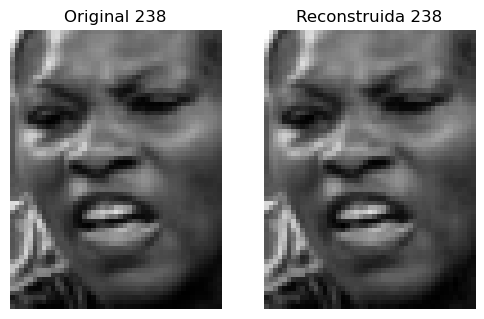

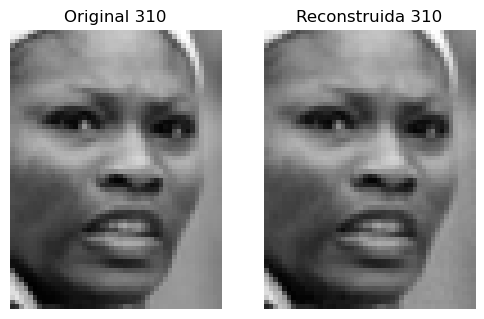

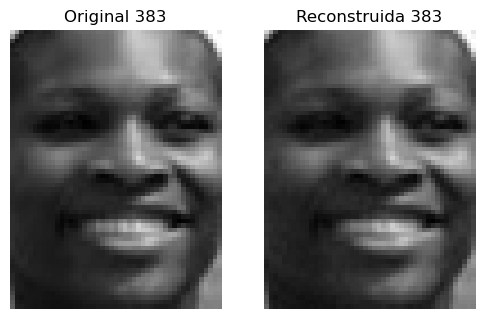

In [22]:
for i in indices_imagenes_s[:5]:
    fig, axs = plt.subplots(1, 2, figsize=(6, 6))
    
    # Imagen original
    axs[0].imshow(imagenes[i], cmap='gray')
    axs[0].set_title(f"Original {i}")
    axs[0].axis('off')
    
    # Imagen reconstruida
    imagen_reconstruida = XNuevo[i].reshape(imagenes.shape[1], imagenes.shape[2])
    axs[1].imshow(imagen_reconstruida, cmap='gray')
    axs[1].set_title(f"Reconstruida {i}")
    axs[1].axis('off')
    
    plt.show()

Se puede ver que cambia tan solo un poco la imagen, si se ven diferencias sutiles, esto es porque con 1000 componentes igual se explica el 99.7% de la varianza, solo se pierde un 0.3% de informacion, por lo que no es muy perceptible al ojo, pero si se puede ver como se distorsiona la imagen en algunos lugares

### 4. Uniendo Aprendizaje No Supervisado y Supervisado

Dado que cada rostro puede ser representado por las eigenfaces, y la relación que existe entre componentes principales y la SVD, esto sugiere que los componentes principales aquí determinados pueden servir de insumo para un algoritmo de clasificación de aprendizaje supervisado. En este sección del taller haremos esto.

Para ello construiremos un modelo de clasificación logístico para predecir si la imagen pertenece a `George W Bush`  (el individuo con más imágenes en la base)  o no.

#### 4.1. Identificando a `George W Bush`

Cree una variable binaria que tome el valor 1 si la imagen pertenece a `George W Bush` y 0 en caso contrario.

In [23]:
# Utilice este espacio para escribir el código.
indice_gwb = np.where(data.target_names == 'George W Bush')[0][0]

George_W_Bush_binaria = np.where(data.target == indice_gwb, 1, 0)

George_W_Bush_binaria

array([0, 1, 0, ..., 1, 0, 1])

Se crea la nueva variable binaria para George W Bush, donde es 1 si la imagen pertence a el o 0 de lo contrario, lo que nos ayudara a poder correr un modelo de regresion logistica

#### 4.2. Bases de Entrenamiento y Prueba.

Divida la base utilizada anteriormente en dos: 80% de la base de imágenes asígnelas a la base de entrenamiento y el 20% restante a la de prueba, utilice un `random_state=10101`. 

In [24]:
# Utilice este espacio para escribir el código.
from sklearn.model_selection import train_test_split

X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X, George_W_Bush_binaria, test_size=0.2, random_state=10101)

print("Tamaño de la base de entrenamiento:", len(X_entrenamiento))
print("Tamaño de la base de prueba:", len(X_prueba))


Tamaño de la base de entrenamiento: 2070
Tamaño de la base de prueba: 518


In [25]:
print("Shape de la base de entrenamiento:", X_entrenamiento.shape)
print("Shape de la base de prueba:", X_prueba.shape)

Shape de la base de entrenamiento: (2070, 2914)
Shape de la base de prueba: (518, 2914)


Se separan los datos en entrenamiento y prueba usando los datos X, y la nueva variable binaria creada, se toma un 20% para prueba y 80% entrenamiento lo que resulta en bases de 518 y 2070 respectivamente. Tambien se puede ver que tienen ambas 2914 columnas y solo el numero de imagenes como filas

#### 4.3. Descomposición en Valores Singulares 

Para la base de entrenamiento y de prueba, realice la descomposición en valores singulares (Recuerde recentrar las matrices para que tenga media 0). 

In [26]:
# Utilice este espacio para escribir el código.

X_entrenamiento_recentrado = X_entrenamiento - np.mean(X_entrenamiento, axis=0)

X_prueba_recentrado = X_prueba - np.mean(X_prueba, axis=0)

U_entrenamiento, S_entrenamiento, Vt_entrenamiento = np.linalg.svd(X_entrenamiento_recentrado)

U_prueba, S_prueba, Vt_prueba = np.linalg.svd(X_prueba_recentrado)


In [27]:
print('Train')
print('U: ',U_entrenamiento.shape, 'S: ',S_entrenamiento.shape, 'Vt: ',Vt_entrenamiento.shape)

Train
U:  (2070, 2070) S:  (2070,) Vt:  (2914, 2914)


In [28]:
print('Test')
print('U: ',U_prueba.shape, 'S: ',S_prueba.shape, 'Vt: ',Vt_prueba.shape)

Test
U:  (518, 518) S:  (518,) Vt:  (2914, 2914)


Se le resta a cada X su media, tanto para entrenamiento como prueba y se sacan las matrices de SVD, con estas es posible observar que S es un vector de n componentes que se debe convertir despues en una matriz de n x k, U que es n x n y Vt que es de k x k

#### 4.4. Estimación de modelo de aprendizaje supervisado


Utilizando $k=1000$ valores singulares, construya los 1000 primeros componentes principales y úselos como predictores en su modelo logístico. Utilice como métrica de performance el porcentaje de imágenes de `George W Bush` clasificadas correctamente.

Para estimar su modelo logístico utilice el `solver='sag`,`random_state=10101` y `max_iter=1000`. Como se muestra a continuación:



In [29]:
#Prueba
S2_prueba=np.resize(S_prueba,[X_prueba_recentrado.shape[0],1])

matriz_i_prueba=np.eye(X_prueba_recentrado.shape[0], X_prueba_recentrado.shape[1])

S_nueva_prueba= S2_prueba * matriz_i_prueba



#Entrenamiento
S2_entrenamiento=np.resize(S_entrenamiento,[X_entrenamiento_recentrado.shape[0],1])

matriz_i_entrenamiento=np.eye(X_entrenamiento_recentrado.shape[0], X_entrenamiento_recentrado.shape[1])

S_nueva_entrenamiento= S2_entrenamiento * matriz_i_entrenamiento


print('S Nueva Entrenamiento',S_nueva_entrenamiento.shape)
print('S Nueva Prueba',S_nueva_prueba.shape)

S Nueva Entrenamiento (2070, 2914)
S Nueva Prueba (518, 2914)


Se transforma S para poder hacer multiplicacion de matrices que permita que U*S sea del mismo tamaño que X, n x k. Para eso se multiplica S por la matriz identidad haciendo un resize a la matriz S. Lo que resulta en las dos nuevas matrices necesarias para componentes principales

In [30]:
k = 1000

X_PCA_test=np.dot(U_prueba[:,:k],S_nueva_prueba[:k,:k])

X_PCA_train=np.dot(U_entrenamiento[:,:k],S_nueva_entrenamiento[:k,:k])


print('Froma de PCA Entrenamiento: ',X_PCA_train.shape)

print('Froma de PCA Prueba: ',X_PCA_test.shape)

Froma de PCA Entrenamiento:  (2070, 1000)
Froma de PCA Prueba:  (518, 1000)


Una vez separados los datos de entrenamiento & prueba y encontradas las matrices de U, S y V, es posible separar en K componentes principales haciendo la multiplicacion matricial entre X y V para encontrar la matriz X de PCA, para tanto los datos de entrenamiento como de prueba

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score


Modelo_Logistico = LogisticRegression(solver='sag',random_state=10101,max_iter=1000)

# Utilice este espacio para escribir el código restante.

Modelo_Logistico.fit(X_PCA_train,y_entrenamiento)


predicciones = Modelo_Logistico.predict(X_PCA_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_prueba, predicciones)
recall = recall_score(y_prueba, predicciones, average='macro')

porcentaje_correctas = 100 * accuracy

print("Porcentaje de imágenes de George W Bush clasificadas correctamente:", porcentaje_correctas)
print("Recall del modelo:", recall)

Porcentaje de imágenes de George W Bush clasificadas correctamente: 72.77992277992279
Recall del modelo: 0.5580357142857143


Se puede ver que con 1000 componentes principales que representa un 99.7% de la varianza se clasifica correctamente a George W Bush un 72% de las veces. Aunque queremos ver la metrica de clasificacion el porcentaje de imagenes de George W Bush clasificadas correctamente, si la clase de George Bush tiene muchas más observaciones que la clase de otras personas, el modelo podría estar sesgado hacia la clase mayoritaria. En estos casos, la precisión puede ser engañosa porque el modelo puede simplemente predecir la clase mayoritaria la mayoría del tiempo para obtener una alta precisión. 

El recall del 55% quiere decir que De todos los ejemplos que realmente son positivos el modelo ha identificado el 55% de ellos correctamente. Es decir que de 100 fotos de George Bush el modelo ha detectado correctamente 55 de las fotos

#### 4.5. Mejorando el Ajuste

Trate ahora el número de valores singulares como un hiper-parámetro a encontrar. Emplee validación cruzada con 5 o 10 folds (dependiendo de su poder computacional) para encontrar el número óptimo de valores singulares. Con este modelo, evalúe el porcentaje de imágenes de `George W Bush` clasificadas correctamente en su muestra de prueba. Compare y discuta esta forma de elegir el número de variables con aquella utilizada en  4.4. (Esto puede tomar mucho tiempo y requerir mucha capacidad computacional, puede aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [35]:
# Utilice este espacio para escribir el código.
from sklearn.model_selection import cross_val_score, KFold

k_values = [350, 400, 500,800,900, 950, 1000, 1500,2000]


kf = KFold(n_splits=10, shuffle=True, random_state=10101)

cv_results = []

for k in k_values:
    
    X_PCA_test=np.dot(U_prueba[:,:k],S_nueva_prueba[:k,:k])

    X_PCA_train=np.dot(U_entrenamiento[:,:k],S_nueva_entrenamiento[:k,:k])

    modelo_logistico = LogisticRegression(solver='sag', random_state=10101, max_iter=1000)
    scores = cross_val_score(modelo_logistico, X_PCA_train, y_entrenamiento, cv=kf, scoring='accuracy')
    
    cv_results.append((k, np.mean(scores)))

best_k, best_score = max(cv_results, key=lambda x: x[1])

print('Número óptimo de componentes principales:', best_k)

X_PCA_test_best=np.dot(U_prueba[:,:best_k],S_nueva_prueba[:best_k,:best_k])

X_PCA_train_best=np.dot(U_entrenamiento[:,:best_k],S_nueva_entrenamiento[:best_k,:best_k])

modelo_logistico_final = LogisticRegression(solver='sag', random_state=10101, max_iter=1000)
modelo_logistico_final.fit(X_PCA_train_best, y_entrenamiento)


# Realizar predicciones con el modelo ajustado
predicciones_prueba = modelo_logistico_final.predict(X_PCA_test_best)

# Calcular el porcentaje de precisión en los datos de prueba
accuracy_prueba = np.mean(predicciones_prueba == y_prueba) * 100
recall_prueba = recall_score(y_prueba, predicciones, average='macro')

print("Porcentaje de imágenes de George W Bush clasificadas correctamente:", accuracy_prueba)

print("Recall del modelo:", recall_prueba)


Número óptimo de componentes principales: 350
Porcentaje de imágenes de George W Bush clasificadas correctamente: 72.00772200772201
Recall del modelo: 0.5580357142857143


In [34]:
cv_results

[(350, 0.903864734299517),
 (400, 0.9072463768115941),
 (500, 0.9028985507246376),
 (800, 0.9067632850241546),
 (900, 0.9077294685990338),
 (950, 0.9072463768115941),
 (1000, 0.906280193236715),
 (1500, 0.9067632850241546),
 (2000, 0.9067632850241546)]

Utilizado lo hecho anteriormente de multiplicacion entre U y S, tomando solamente las K componentes para U & S, e iterando K para varios valores de componentes principales

Se encuentra entonces que el K optimo de componentes principales es igual a 900. Se encuentra que con este modelo se predice el 72.97% de las veces correctamente

Esto se debe a que con K=900 componentes se explica el  99.7% de la varianza como se puede ver a continuacion:

Proporción de la varianza representada por los primeros K=900 valores singulares: 0.9970


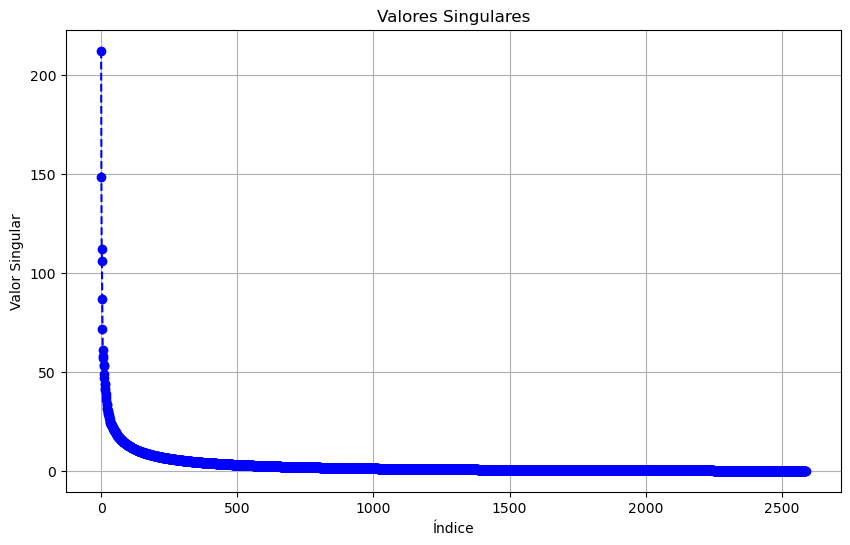

In [255]:

n_imagenes, altura, ancho = imagenes.shape

imagenes_a_planar = imagenes_sin_rostro_promedio.reshape(n_imagenes, altura * ancho)

U, S, Vt = np.linalg.svd(imagenes_a_planar, full_matrices=True)

K = 900
S_reducido = S[:K]
U_reducido = U[:, :K]
Vt_reducido = Vt[:K, :]

varianza_total = np.sum(S**2)
varianza_explicada = np.sum(S_reducido**2)
proporcion_varianza = varianza_explicada / varianza_total

print(f"Proporción de la varianza representada por los primeros K={K} valores singulares: {proporcion_varianza:.4f}")

# Opcional: Graficar los valores singulares
plt.figure(figsize=(10, 6))
plt.plot(S, marker='o', linestyle='--', color='b')
plt.title('Valores Singulares')
plt.xlabel('Índice')
plt.ylabel('Valor Singular')
plt.grid(True)
plt.show()